In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
dfTrain = pd.read_csv('../data/TRAIN_TEST_corrected2/train_corrected2.csv').sample(frac=0.10)
train = dfTrain.drop(['price_usd', 'id'], axis=1)
target = dfTrain.price_usd

In [3]:
# DATA SCALING

scaler = StandardScaler().fit(train)
train = pd.DataFrame(scaler.transform(train), columns=train.columns)
train.head(3)

,year_created,month_created,day_created,distance_to_obelisco_mtrs,lat,lon,surface_total_in_m2,rooms,PH,apartment,house,store
0,-1.018923,1.163549,-1.507936,-0.259258,-0.258231,0.189782,-0.340705,-1.254500,-0.255273,0.853473,-0.726538,-0.122437
1,-1.018923,0.230979,0.487775,-0.261778,-0.257268,0.194723,-0.404027,-0.344144,-0.255273,0.853473,-0.726538,-0.122437
2,-0.180133,0.852692,-0.842699,-0.255465,-0.254601,0.182869,-0.331324,-0.344144,-0.255273,0.853473,-0.726538,-0.122437


In [4]:
# PARAMETROS PARA SVM
param_grid = [
                {'C': [0.1],
                 'kernel': ['rbf'],
                 'gamma': ['auto'], 
                 'max_iter' : [10, 20, 40, 80, 160, 320, 640, 1280, 2560], 
                 'cache_size' : [2000] } ]

# MEDIDA DE SCORE PARA CROSS-VALIDATION
scoring = {'MSE': 'neg_mean_squared_error'}

svr = SVR()
gs = GridSearchCV(svr, scoring=scoring, param_grid=param_grid, cv=10, refit='MSE', return_train_score=False)

In [5]:
# COMIENZO EL GRID SEARCH
gs.fit(train, target);

/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=40).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=80).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:218: 

In [6]:
results = gs.cv_results_
dfResults = pd.DataFrame(results).loc[:, ('rank_test_MSE', 'mean_test_MSE', 
                                          'param_kernel', 'param_C', 'param_gamma', 'param_max_iter')].infer_objects()

In [7]:
dfResults.sort_values(by='rank_test_MSE').head(10)

,rank_test_MSE,mean_test_MSE,param_kernel,param_C,param_gamma,param_max_iter
8,1,-1.487281e+11,rbf,0.1,auto,2560
7,2,-2.428796e+11,rbf,0.1,auto,1280
6,3,-3.775426e+11,rbf,0.1,auto,640
5,4,-6.271926e+11,rbf,0.1,auto,320
4,5,-1.182883e+12,rbf,0.1,auto,160
3,6,-2.175096e+12,rbf,0.1,auto,80
2,7,-4.269104e+12,rbf,0.1,auto,40
1,8,-1.230686e+13,rbf,0.1,auto,20
0,9,-2.849994e+13,rbf,0.1,auto,10


In [8]:
#combinatorias = set()

#for metric in param_grid[0]['metric'] :
#    for weight in param_grid[0]['weights'] :
#        tupla = (metric, weight)
        
#        if tupla not in combinatorias and tupla[::-1] not in combinatorias :
#            combinatorias.add(tupla)
            
#dfs = []

#for opcion in combinatorias :
#    dfs.append(dfResults.loc[dfResults.param_metric.str.contains(opcion[0]) & dfResults.param_weights.str.contains(opcion[1])])

In [9]:
# Ploteo los resultados

#ax = None
#for df in dfs :
#    df = df.reset_index()
#    new_name = df.param_metric[0] + ' | ' + df.param_weights[0]
#    df = df.rename(columns={'mean_test_MSE':new_name })
#    ax = df.plot(ax=ax, x='param_n_neighbors', y=new_name, 
#                 figsize=(12, 12))

#ax.grid()
#ax.set_title("Grid Search SVR: finding best metric and k value", fontsize=18)
#ax.set_xlabel('K neighbors', fontsize=14)
#ax.set_ylabel('NegMSE\n(higher is better)', fontsize=14)
#ax.legend(fontsize=11);

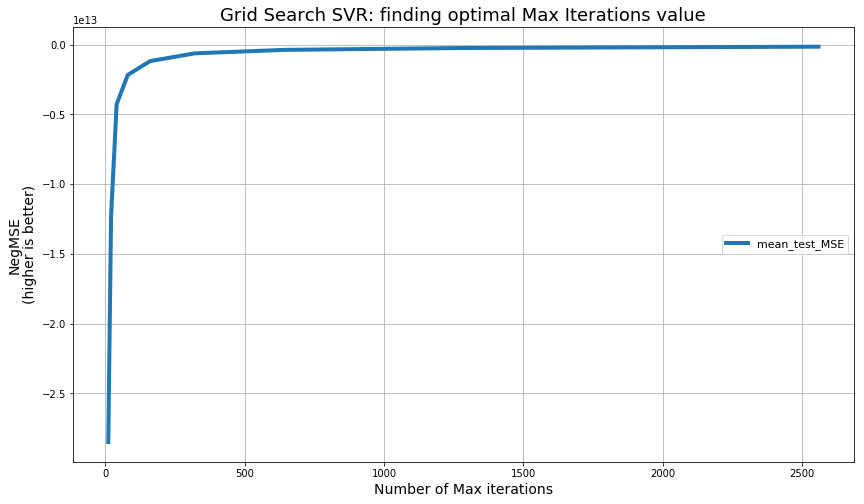

In [21]:
ax = dfResults.plot(x='param_max_iter', y='mean_test_MSE', figsize=(14, 8), lw=4)
ax.grid()
ax.set_title("Grid Search SVR: finding optimal Max Iterations value", fontsize=18)
ax.set_xlabel('Number of Max iterations', fontsize=14)
ax.set_ylabel('NegMSE\n(higher is better)', fontsize=14)
ax.legend(fontsize=11, loc='center right');

In [10]:
print "\nMejores parametros:", gs.best_params_
print "Tuvieron un error de:", repr(-gs.best_score_), "midiendo como MSE"


Mejores parametros: {'cache_size': 2000, 'kernel': 'rbf', 'C': 0.1, 'max_iter': 2560, 'gamma': 'auto'}
Tuvieron un error de: 148728147122.66522 midiendo como MSE
